In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score



import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/NFLX.csv")

In [6]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [7]:
viz = df.copy()

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.shape

(1009, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [12]:
train, test = train_test_split(df, test_size = 0.2)

In [13]:
test_pred = test.copy()

In [14]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
993,2022-01-13,537.059998,540.789978,518.260010,519.200012,519.200012,4475100
718,2020-12-10,494.559998,503.769989,492.910004,501.089996,501.089996,3018200
850,2021-06-22,498.540009,513.549988,495.799988,508.820007,508.820007,5809300
696,2020-11-09,485.540009,495.850006,467.260010,470.500000,470.500000,10419700
251,2019-02-05,353.200012,360.000000,352.899994,355.809998,355.809998,9046600
483,2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200
898,2021-08-30,557.250000,567.159973,556.450012,566.179993,566.179993,2434800
518,2020-02-27,371.459991,391.559998,370.600006,371.709991,371.709991,10967700
288,2019-03-29,357.160004,358.250000,353.709991,356.559998,356.559998,4705600
316,2019-05-09,360.899994,364.200012,352.750000,362.750000,362.750000,5882600


In [15]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
342,2019-06-17,342.690002,351.769989,342.059998,350.619995,350.619995,5358200
245,2019-01-28,334.700012,336.299988,328.880005,335.660004,335.660004,8652100
112,2018-07-17,346.950012,385.000000,344.000000,379.480011,379.480011,58410400
503,2020-02-05,375.130005,375.250000,362.299988,369.670013,369.670013,6437000
50,2018-04-18,336.299988,338.820007,331.100006,334.519989,334.519989,11221100
270,2019-03-05,351.459991,356.170013,348.250000,354.299988,354.299988,5937800
708,2020-11-25,485.130005,486.899994,478.920013,485.000000,485.000000,3598600
393,2019-08-28,289.470001,292.820007,287.750000,291.769989,291.769989,3955700
964,2021-12-02,617.099976,625.359985,612.880005,616.469971,616.469971,3331100
100,2018-06-28,395.000000,396.899994,387.100006,395.420013,395.420013,12219900


In [16]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [17]:
y_train = train['Close'].values
y_test = test['Close'].values

In [18]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = model_lnr.predict(x_test)

In [20]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.64476994]


In [21]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 16.349
RMSE 4.043
MAE 2.885
MAPE 0.007
R2 Score :  0.999


In [22]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")

In [23]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [24]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


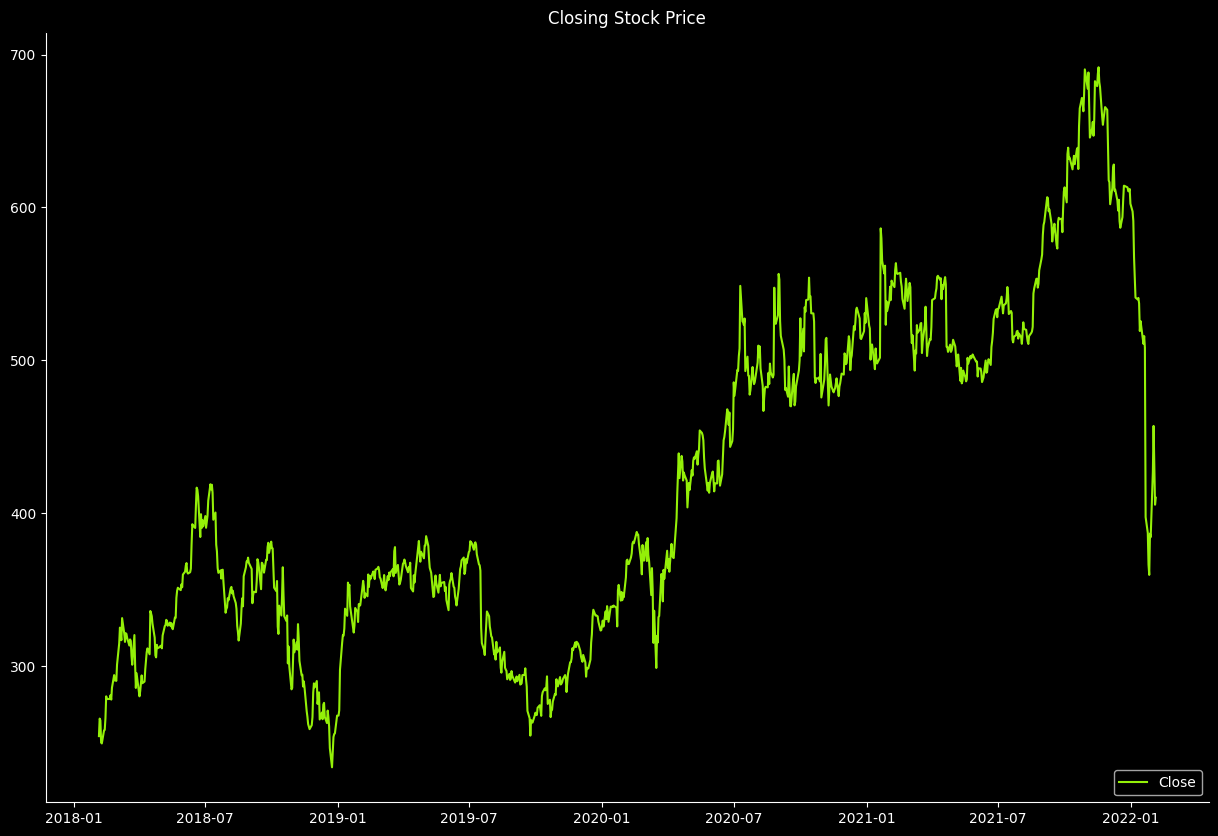

In [25]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

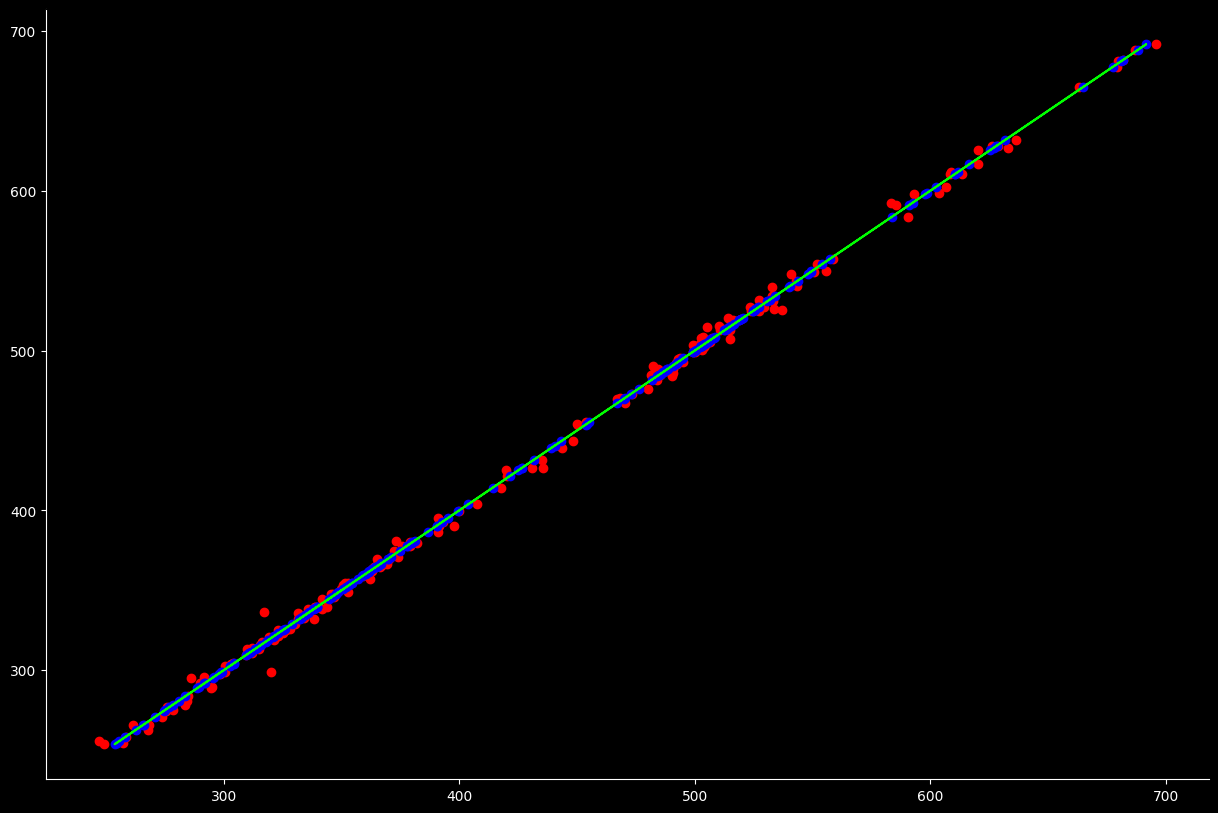

In [26]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [27]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
342,2019-06-17,342.690002,351.769989,342.059998,350.619995,350.619995,5358200,349.607826
245,2019-01-28,334.700012,336.299988,328.880005,335.660004,335.660004,8652100,331.635875
112,2018-07-17,346.950012,385.000000,344.000000,379.480011,379.480011,58410400,380.120458
503,2020-02-05,375.130005,375.250000,362.299988,369.670013,369.670013,6437000,364.990957
50,2018-04-18,336.299988,338.820007,331.100006,334.519989,334.519989,11221100,334.714206
...,...,...,...,...,...,...,...,...
721,2020-12-15,518.500000,524.700012,513.559998,519.780029,519.780029,3394900,519.520772
986,2022-01-04,599.909973,600.409973,581.599976,591.150024,591.150024,4393100,585.580266
520,2020-03-02,373.109985,381.359985,364.500000,381.049988,381.049988,6997900,373.025430
20,2018-03-06,319.880005,325.790009,316.500000,325.220001,325.220001,18525800,323.155919


In [28]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,429.425988,109.546932,253.669998,336.752487,417.875000,507.984993,691.690002
Close_Prediction,202.0,429.501172,109.476659,247.033785,336.326947,418.675991,506.395178,695.782903


In [29]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [30]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-06,265.720001,261.531703
2018-02-07,NaN,NaN
2018-02-08,NaN,NaN
2018-02-09,NaN,NaN
2018-02-10,NaN,NaN
...,...,...
2022-01-23,NaN,NaN
2022-01-24,NaN,NaN
2022-01-25,NaN,NaN


In [31]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!
